In [4]:
import gym
import d4rl # Import required to register environments, you may need to also import the submodule

# Create the environment
env = gym.make('maze2d-umaze-v1')

# d4rl abides by the OpenAI gym interface
env.reset()
env.step(env.action_space.sample())

# Each task is associated with a dataset
# dataset contains observations, actions, rewards, terminals, and infos
# dataset = env.get_dataset()
# print(dataset['observations']) # An N x dim_observation Numpy array of observations

# Alternatively, use d4rl.qlearning_dataset which
# also adds next_observations.
dataset = d4rl.qlearning_dataset(env)
print(dataset['actions'][:3])
print(dataset['next_observations'][:3])
print(dataset['rewards'][:3])
print(dataset['terminals'][:3])
# print(dataset['infos'][:3])
print(dataset['observations'][:3])

load datafile: 100%|██████████| 8/8 [00:00<00:00, 36.91it/s]


[[-0.56856084 -0.27724722]
 [-1.          0.6666507 ]
 [-1.          1.        ]]
[[ 1.0843927   1.97413    -0.12562364 -0.04433781]
 [ 1.0807577   1.9752754  -0.3634883   0.11453988]
 [ 1.0747498   1.9787997  -0.60078645  0.35243094]]
[0. 0. 0.]
[False False False]
[[ 1.0856489   1.9745734   0.00981035  0.02174424]
 [ 1.0843927   1.97413    -0.12562364 -0.04433781]
 [ 1.0807577   1.9752754  -0.3634883   0.11453988]]


In [2]:
import d4rl


dataset = d4rl.qlearning_dataset(env, randomize=True) # shuffled dataset

No module named 'flow'
No module named 'carla'
pybullet build time: May 20 2022 19:45:31


NameError: name 'env' is not defined

In [1]:
from run_example.run_cql import get_args

get_args()

usage: ipykernel_launcher.py [-h] [--algo-name ALGO_NAME] [--task TASK]
                             [--seed SEED] [--hidden-dims [HIDDEN_DIMS ...]]
                             [--actor-lr ACTOR_LR] [--critic-lr CRITIC_LR]
                             [--gamma GAMMA] [--tau TAU] [--alpha ALPHA]
                             [--target-entropy TARGET_ENTROPY]
                             [--auto-alpha AUTO_ALPHA] [--alpha-lr ALPHA_LR]
                             [--cql-weight CQL_WEIGHT]
                             [--temperature TEMPERATURE]
                             [--max-q-backup MAX_Q_BACKUP]
                             [--deterministic-backup DETERMINISTIC_BACKUP]
                             [--with-lagrange WITH_LAGRANGE]
                             [--lagrange-threshold LAGRANGE_THRESHOLD]
                             [--cql-alpha-lr CQL_ALPHA_LR]
                             [--num-repeat-actions NUM_REPEAT_ACTIONS]
                             [--epoch EPOCH] [--step-pe

SystemExit: 2

/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3513: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [2]:
import d4rl

datasets = d4rl.qlearning_dataset_names + d4rl.control_suite_dataset_names
print(datasets)
print

AttributeError: module 'd4rl' has no attribute 'qlearning_dataset_names'

In [2]:
import torch
import numpy as np

# 创建一个均值为 0，标准差为 1 的正态分布对象
normal_dist = torch.distributions.Normal(0, 1)

# 从正态分布中采样一个随机数
sample = normal_dist.sample()

# 计算采样结果的对数概率 (概率密度函数)
log_prob = normal_dist.log_prob(sample)

print("Sampled value:", sample)
print("Log probability:", log_prob)

sam = normal_dist.rsample()
print(sam)
log = np.log(sample)

Sampled value: tensor(1.4636)
Log probability: tensor(-1.9900)
tensor(-0.2640)


In [4]:
import torch

action = [1.2, 2.3, 3.4]
action = torch.tensor(action)

action.log_prob()

AttributeError: 'Tensor' object has no attribute 'log_prob'

In [12]:
import torch
from torch.distributions.normal import Normal


m = Normal(torch.tensor([0.0]), torch.tensor([1.0]))

t = [[1.2, 2.3, 3.4], [1.2, 2.3, 3.4]]
a = m.log_prob(torch.tensor(t))
print(a)

b = m.log_prob(torch.tensor(t)).sum(-1, keepdim=True)
print(b)

tensor([[-1.6389, -3.5639, -6.6989],
        [-1.6389, -3.5639, -6.6989]])
tensor([[-11.9018],
        [-11.9018]])


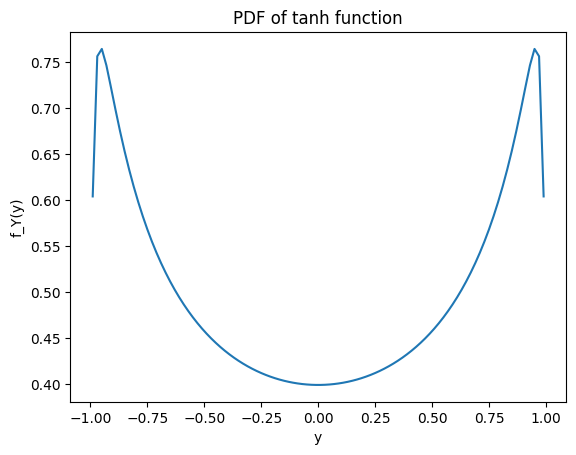

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the parameters of the original normal distribution
mu = 0
sigma = 1

# Define the range of the transformed variable
y = np.linspace(-0.99, 0.99, 100)

# Calculate the PDF of the tanh function
f_y = norm.pdf(np.arctanh(y), mu, sigma) * np.abs(1 / (1 - y**2))

# Plot the PDF of the tanh function
plt.plot(y, f_y)
plt.xlabel('y')
plt.ylabel('f_Y(y)')
plt.title('PDF of tanh function')
plt.show()


GitHub Copilot: tanh_normal 分布是一种连续概率分布，它是由一个标准正态分布 $z$ 通过以下变换得到的：

$$
x = \mu + \sigma \cdot \tanh(z)
$$

其中，$\mu$ 和 $\sigma$ 是分布的均值和标准差。tanh_normal 分布的概率密度函数可以表示为：

$$
p(x) = \frac{1}{\sigma \cdot \sqrt{2\pi}} \cdot \frac{1}{\cosh^2\left(\frac{x-\mu}{\sigma}\right)}
$$

tanh_normal 分布的对数概率密度可以表示为：

$$
\log p(x) = -\log(\sigma) - \frac{1}{2}\log(2\pi) - 2\cdot\sum_{i=1}^D\log\left(\exp\left(\frac{2}{\sigma_i}(x_i-\mu_i)\right) + 1\right)
$$

其中，$D$ 是分布的维度。这个式子可以通过对概率密度函数取对数并化简得到。在实际计算中，通常使用这个式子来计算 tanh_normal 分布的对数概率密度，因为它可以避免数值下溢的问题。

GitHub Copilot: 在强化学习中，我们通常使用 Q-learning 算法来学习一个值函数 $Q(s,a)$，它表示在状态 $s$ 下采取动作 $a$ 的价值。Q-learning 算法的更新公式如下：

$$
Q(s_t,a_t) \leftarrow Q(s_t,a_t) + \alpha \left(r_t + \gamma \max_{a'} Q(s_{t+1},a') - Q(s_t,a_t)\right)
$$

其中，$r_t$ 是在状态 $s_t$ 下采取动作 $a_t$ 后获得的奖励，$\gamma$ 是折扣因子，$\alpha$ 是学习率，$s_{t+1}$ 是采取动作 $a_t$ 后转移到的下一个状态，$\max_{a'} Q(s_{t+1},a')$ 是在下一个状态 $s_{t+1}$ 下采取最优动作所获得的最大价值。

在实际应用中，我们通常使用一个目标网络（target network）来计算目标价值 $\hat{Q}(s_t,a_t)$，以避免价值函数的过度估计。目标网络的更新方式如下：

$$
\hat{Q}(s_t,a_t) \leftarrow r_t + \gamma \max_{a'} Q'(s_{t+1},a')
$$

其中，$Q'(s_{t+1},a')$ 是目标网络在下一个状态 $s_{t+1}$ 下采取动作 $a'$ 所获得的价值。

在这个更新公式中，$(1 - terminals)$ 的作用是将终止状态的目标价值设为 $0$。因为在终止状态下，不存在下一个状态 $s_{t+1}$，所以目标价值应该为当前状态的奖励 $r_t$。而在其他状态下，目标价值应该为 $r_t + \gamma \max_{a'} Q'(s_{t+1},a')$。因此，$(1 - terminals)$ 的作用是将终止状态的目标价值设为 $0$，而在其他状态下，目标价值应该为 $r_t + \gamma \max_{a'} Q'(s_{t+1},a')$。

GitHub Copilot: 在强化学习中，我们通常将一个任务建模为一个马尔可夫决策过程（Markov Decision Process，MDP）。MDP 是一个五元组 $(S,A,P,R,\gamma)$，其中 $S$ 是状态集合，$A$ 是动作集合，$P$ 是状态转移概率函数，$R$ 是奖励函数，$\gamma$ 是折扣因子。

在 MDP 中，智能体在状态 $s_t$ 下采取动作 $a_t$，会转移到下一个状态 $s_{t+1}$，并获得一个奖励 $r_t$。目标价值 $\hat{Q}(s_t,a_t)$ 表示在状态 $s_t$ 下采取动作 $a_t$ 的目标价值，它应该等于当前时刻的奖励 $r_t$ 加上下一个状态的最大价值 $Q'(s_{t+1},a')$，即：

$$
\hat{Q}(s_t,a_t) = r_t + \gamma \max_{a'} Q'(s_{t+1},a')
$$

但是，在终止状态下，不存在下一个状态 $s_{t+1}$，因此无法计算下一个状态的最大价值。因此，我们将终止状态的目标价值设为当前状态的奖励 $r_t$，即：

$$
\hat{Q}(s_t,a_t) = r_t
$$

这样可以确保在终止状态下，目标价值等于当前状态的奖励。